24/10/09 18:31:24 WARN Utils: Your hostname, Brackens-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.168 instead (on interface en0)
24/10/09 18:31:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
24/10/09 18:31:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/09 18:31:24 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


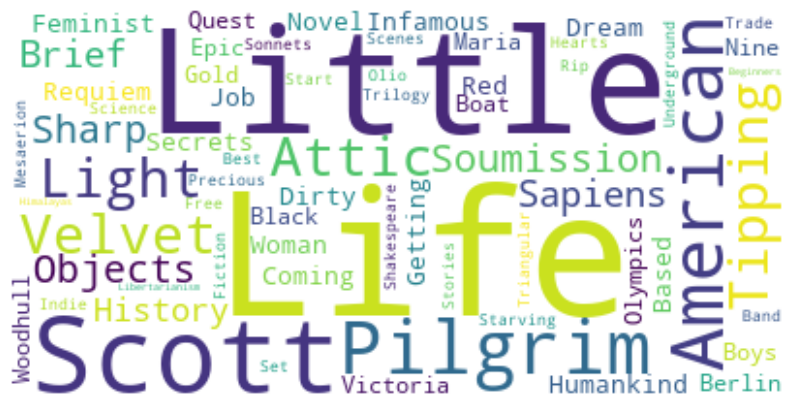

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Word Cloud").getOrCreate()

df = spark.read.csv("../data/output_books.csv", header=True, inferSchema=True)

pandas_df = df.toPandas()

text = " ".join(title for title in pandas_df['title'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

spark.stop()
